   ## Feature Scaling -  DC Housing and Properties

In [29]:
# import libraries 

import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [30]:
filepath = "datasets/DC_Properties.csv"

DChousing_df = pd.read_csv(filepath)
#preview data
DChousing_df.head()

/Users/ekramjiru/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [31]:
#check if any missing values in the data
DChousing_df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [32]:
#check for total number of missing values 
DChousing_df.isnull().sum()

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY          

In [33]:
#drop all missing prices
cleanDCHouse_df = DChousing_df[DChousing_df['PRICE'].notnull()]

In [34]:
#confirm all null price values have been dropped
cleanDCHouse_df.isnull().sum()

Unnamed: 0                0
BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
NUM_UNITS             40316
ROOMS                     0
BEDRM                     0
AYB                     112
YR_RMDL               40542
EYB                       0
STORIES               40349
SALEDATE                  1
PRICE                     0
QUALIFIED                 0
SALE_NUM                  0
GBA                   40316
BLDG_NUM                  0
STYLE                 40316
STRUCT                40316
GRADE                 40316
CNDTN                 40316
EXTWALL               40316
ROOF                  40316
INTWALL               40316
KITCHENS              40317
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
SOURCE                    0
CMPLX_NUM             57900
LIVING_GBA            57900
FULLADDRESS           40651
CITY                  40647
STATE               

In [35]:
#descriptive statistics for price
cleanDCHouse_df['PRICE'].describe()

count    9.821600e+04
mean     9.313516e+05
std      7.061325e+06
min      1.000000e+00
25%      2.400000e+05
50%      3.999990e+05
75%      6.520000e+05
max      1.374275e+08
Name: PRICE, dtype: float64

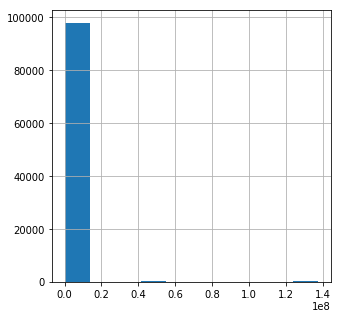

In [36]:
cleanDCHouse_df['PRICE'].hist(figsize=(5,5))

## Z-Score Standardization

In [37]:
#set StandardScale function to a variable
#scaler will use z-score formula on the column
scaler = StandardScaler()
#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
price_zscore = scaler.fit_transform(cleanDCHouse_df[['PRICE']])

In [38]:
#mean and standard deviation of z-score standardized 'Price' column
#mean is very very close to 0 
price_zscore.mean(), price_zscore.std()

(-4.630074029551846e-18, 1.0)

In [39]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
price_z_col = pd.Series(price_zscore.reshape(-1))

In [40]:
#first 5 rows of z-score standardized price column
price_z_col.head()

0    0.023175
1    0.165501
2    0.094975
3    0.144258
4    0.016803
dtype: float64

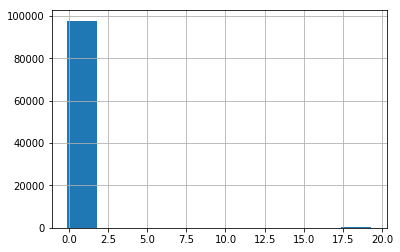

In [41]:
price_z_col.hist()

## Min-Max Scaling

In [42]:
#MinMaxScaler function calculates the formula
minmax_sc = MinMaxScaler()

In [43]:
price_minmax = minmax_sc.fit_transform(cleanDCHouse_df[['PRICE']])

In [44]:
price_minmax.mean(), price_minmax.std()

(0.006777030046710401, 0.0513819049810315)

In [45]:
#convert array into a dataframe column
#look at first 5 rows of min-max values
price_mm_col = pd.Series(price_minmax.reshape(-1))
price_mm_col.head()

0    0.007968
1    0.015281
2    0.011657
3    0.014189
4    0.007640
dtype: float64

In [46]:
#verify the range is between 0 and 1
price_mm_col.min(), price_mm_col.max()

(0.0, 0.9999999999999999)

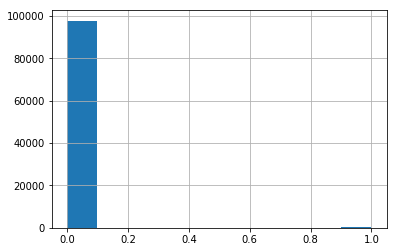

In [47]:
#view histogram of min-max scaled price
price_mm_col.hist()